# NBA Stats for Math350 & Math205 refresher
### A.
1. Data Types (numerical, categoriacal, ordinal)
2. Mean, Median, Mode, Var, std

### B.
1. PDF, PMF
2. Distributions (gaussian, binomial, poisson, uniform, gamma, exponential)
3. Percentiles & Moments

### C. 
1. Covariance & Correlation
2. Conditional Probability
3. Bayes' Theorem

In [266]:
# Imports
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns

In [267]:
#Read_in CSV

df = pd.read_csv('drafted_nba_players.csv')
df.to_csv('output.csv', index=False)
df = pd.read_csv('output.csv')

print(df.head())

   Unnamed: 0       player_name team_abbreviation   age  player_height  \
0           0  Randy Livingston               HOU  22.0         193.04   
1           1  Gaylon Nickerson               WAS  28.0         190.50   
2           2      George Lynch               VAN  26.0         203.20   
3           3    George McCloud               LAL  30.0         203.20   
4           4      George Zidek               DEN  23.0         213.36   

   player_weight                college country draft_year draft_round  ...  \
0      94.800728        Louisiana State     USA       1996           2  ...   
1      86.182480  Northwestern Oklahoma     USA       1994           2  ...   
2     103.418976         North Carolina     USA       1993           1  ...   
3     102.058200          Florida State     USA       1989           1  ...   
4     119.748288                   UCLA     USA       1995           1  ...   

    pts  reb  ast  net_rating  oreb_pct  dreb_pct  usg_pct  ts_pct  ast_pct  \
0

In [268]:
#A1

print(df.columns)
print("\n")

categorical = []
numerical = []

for column_name in df.columns:
    # Check if the first element of the column is a string
    if df[column_name].dtype == 'O':
        categorical.append(column_name)
    else:
        numerical.append(column_name)

print("Categorical Data", categorical)
print("Numerical Data", numerical)

# print(df['player_name'])

Index(['Unnamed: 0', 'player_name', 'team_abbreviation', 'age',
       'player_height', 'player_weight', 'college', 'country', 'draft_year',
       'draft_round', 'draft_number', 'gp', 'pts', 'reb', 'ast', 'net_rating',
       'oreb_pct', 'dreb_pct', 'usg_pct', 'ts_pct', 'ast_pct', 'season'],
      dtype='object')


Categorical Data ['player_name', 'team_abbreviation', 'college', 'country', 'draft_year', 'draft_round', 'draft_number', 'season']
Numerical Data ['Unnamed: 0', 'age', 'player_height', 'player_weight', 'gp', 'pts', 'reb', 'ast', 'net_rating', 'oreb_pct', 'dreb_pct', 'usg_pct', 'ts_pct', 'ast_pct']


In [269]:
#A2 

# Most drafted college
mode_pts = stats.mode(df['pts'])

# All NBA players points per game
mean_pts = round(df['pts'].mean(), 2)
median_pts = round(df['pts'].median(), 2)
std_pts = round(df['pts'].std(), 2)
var_pts = round(df['pts'].var(), 2)

print("Mean:", mean_pts)
print("Median:", median_pts)
print("Standard deviation:", std_pts)
print("Variance:", var_pts)

# 20ppg+ scorers
high_scorers = df[df['pts'] >= 20]

mean_pts = round(high_scorers['pts'].mean(), 2)
median_pts = round(high_scorers['pts'].median(), 2)
std_pts = round(high_scorers['pts'].std(), 2)
var_pts = round(high_scorers['pts'].var(), 2)

print("Mean for 20+ PPG:", mean_pts)
print("Median for 20+ PPG:", median_pts)
print("Standard deviation for 20+ PPG:", std_pts)
print("Variance of points for 20+ PPG:", var_pts)

print(mode_pts)


Mean: 8.21
Median: 6.7
Standard deviation: 6.02
Variance: 36.2
Mean for 20+ PPG: 23.5
Median for 20+ PPG: 22.6
Standard deviation for 20+ PPG: 3.08
Variance of points for 20+ PPG: 9.46
ModeResult(mode=2.0, count=174)


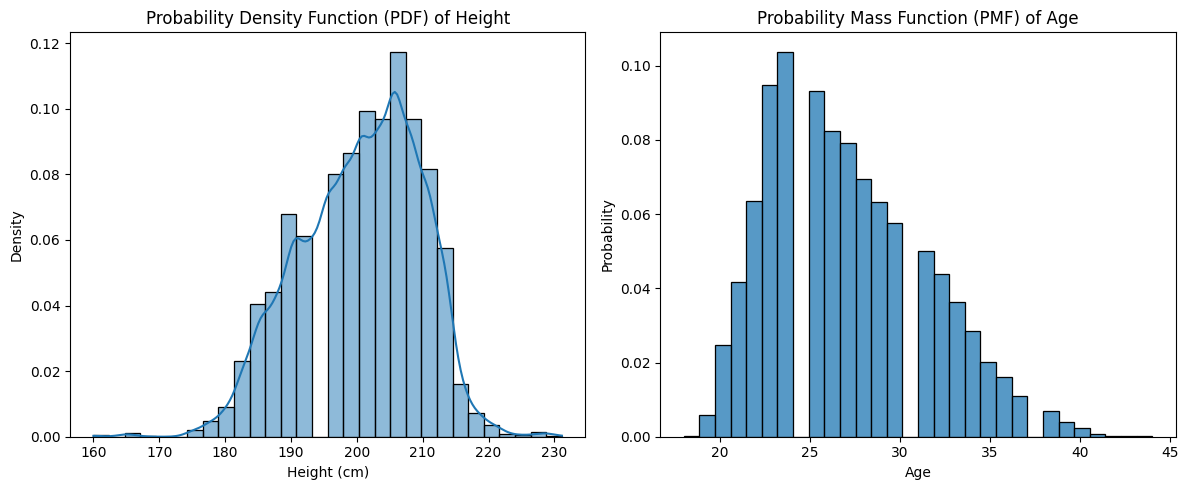

In [270]:
#B1

fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# PDF of Height
sns.histplot(df['player_height'], bins=30, kde=True, stat='probability', ax=axes[0])
axes[0].set_title('Probability Density Function (PDF) of Height')
axes[0].set_xlabel('Height (cm)')
axes[0].set_ylabel('Density')

# PMF of Age
sns.histplot(df['age'], bins=30, kde=False, stat='probability', ax=axes[1])
axes[1].set_title('Probability Mass Function (PMF) of Age')
axes[1].set_xlabel('Age')
axes[1].set_ylabel('Probability')

plt.tight_layout()
plt.show()


Percentiles for 15+ points per game (PPG):
0.25    16.700
0.50    18.800
0.75    21.700
0.99    30.699
Name: pts, dtype: float64

Moments for 15+ points per game (PPG):
First moment (mean): 19.73
Second moment (variance): 14.38
Third moment (skewness): 1.07
Fourth moment (kurtosis): 0.75


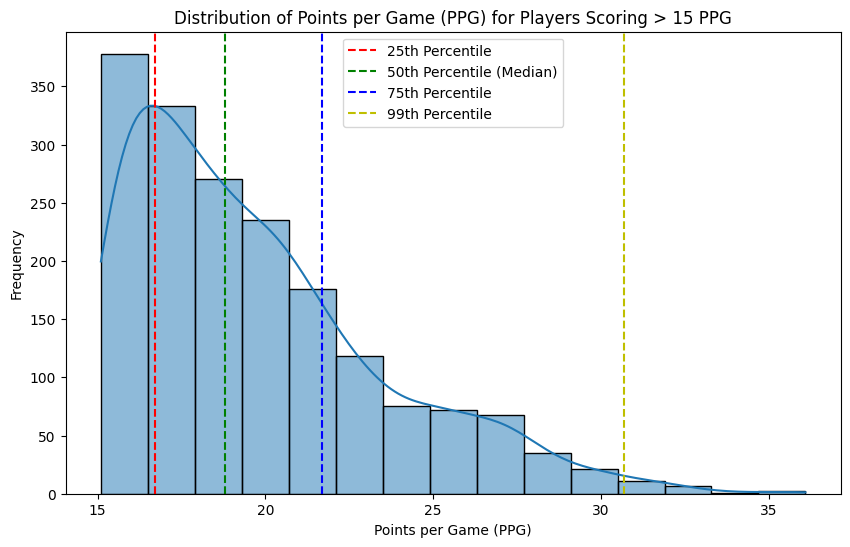

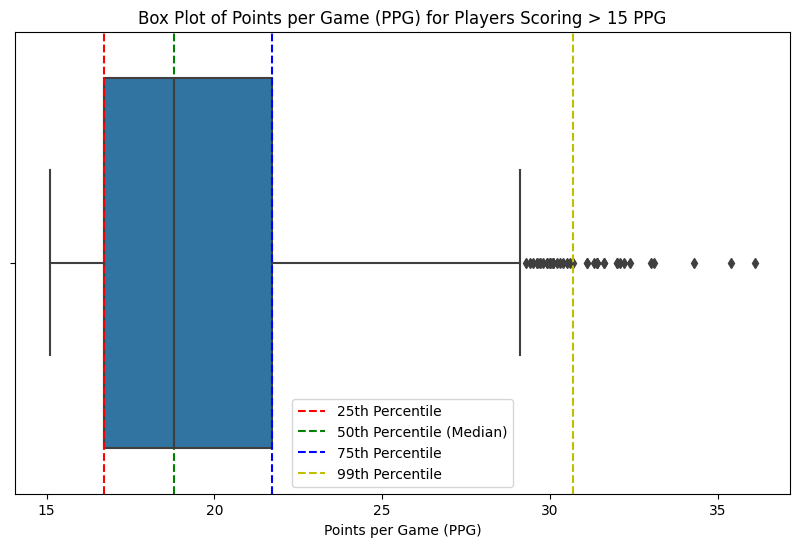

C:\Users\prana\AppData\Local\Temp\ipykernel_22072\3622223911.py:51: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(filtered_ppg['pts'], shade=True)


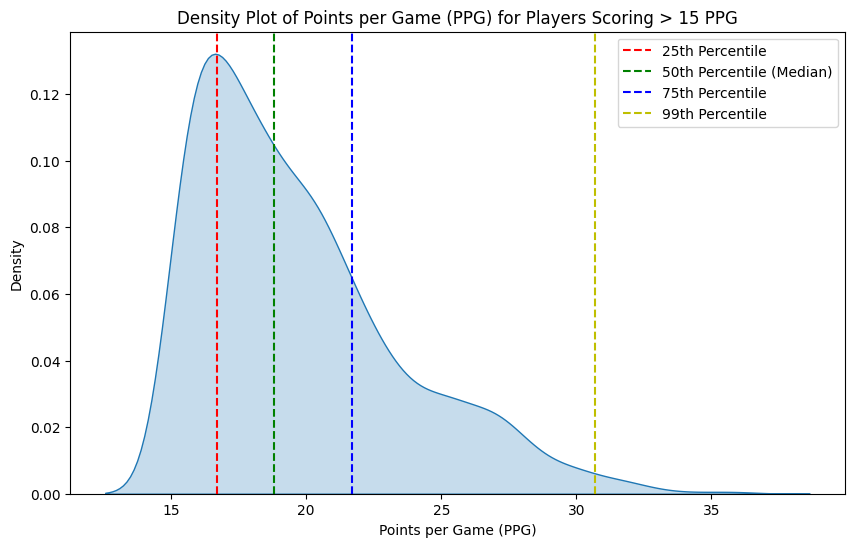

In [271]:
#B3

# Calculate the 25th, 50th (median), and 75th percentiles for points per game (and top 1%)
filtered_ppg = df[df['pts'] > 15.0]
percentiles = filtered_ppg['pts'].quantile([0.25, 0.5, 0.75, 0.99])
print("Percentiles for 15+ points per game (PPG):")
print(percentiles)

# Calculate the moments (1st mean, 2nd variance, 3rd skew, 4th kurtosis)
mean_pts = round(filtered_ppg['pts'].mean(), 2)
var_pts = round(filtered_ppg['pts'].var(), 2)
skewness_pts = round(filtered_ppg['pts'].skew(), 2)

# Calculate the fourth moment (kurtosis)
kurtosis_pts = round(filtered_ppg['pts'].kurtosis(), 2)

# Print the moments
print("\nMoments for 15+ points per game (PPG):")
print("First moment (mean):", mean_pts)
print("Second moment (variance):", var_pts)
print("Third moment (skewness):", skewness_pts)
print("Fourth moment (kurtosis):", kurtosis_pts)

# Plot histogram of points per game
plt.figure(figsize=(10, 6))
sns.histplot(filtered_ppg['pts'], bins=15, kde=True)
plt.axvline(percentiles[0.25], color='r', linestyle='--', label='25th Percentile')
plt.axvline(percentiles[0.50], color='g', linestyle='--', label='50th Percentile (Median)')
plt.axvline(percentiles[0.75], color='b', linestyle='--', label='75th Percentile')
plt.axvline(percentiles[0.99], color='y', linestyle='--', label='99th Percentile')
plt.xlabel('Points per Game (PPG)')
plt.ylabel('Frequency')
plt.title('Distribution of Points per Game (PPG) for Players Scoring > 15 PPG')
plt.legend()
plt.show()

# Plot box plot of points per game
plt.figure(figsize=(10, 6))
sns.boxplot(x=filtered_ppg['pts'])
plt.axvline(percentiles[0.25], color='r', linestyle='--', label='25th Percentile')
plt.axvline(percentiles[0.50], color='g', linestyle='--', label='50th Percentile (Median)')
plt.axvline(percentiles[0.75], color='b', linestyle='--', label='75th Percentile')
plt.axvline(percentiles[0.99], color='y', linestyle='--', label='99th Percentile')
plt.xlabel('Points per Game (PPG)')
plt.title('Box Plot of Points per Game (PPG) for Players Scoring > 15 PPG')
plt.legend()
plt.show()

# Plot density plot of points per game
plt.figure(figsize=(10, 6))
sns.kdeplot(filtered_ppg['pts'], shade=True)
plt.axvline(percentiles[0.25], color='r', linestyle='--', label='25th Percentile')
plt.axvline(percentiles[0.50], color='g', linestyle='--', label='50th Percentile (Median)')
plt.axvline(percentiles[0.75], color='b', linestyle='--', label='75th Percentile')
plt.axvline(percentiles[0.99], color='y', linestyle='--', label='99th Percentile')
plt.xlabel('Points per Game (PPG)')
plt.ylabel('Density')
plt.title('Density Plot of Points per Game (PPG) for Players Scoring > 15 PPG')
plt.legend()
plt.show()

Covariance between usage percentage and 15+ points per game: 0.21
Correlation between usage percentage and 15+ points per game: 0.64


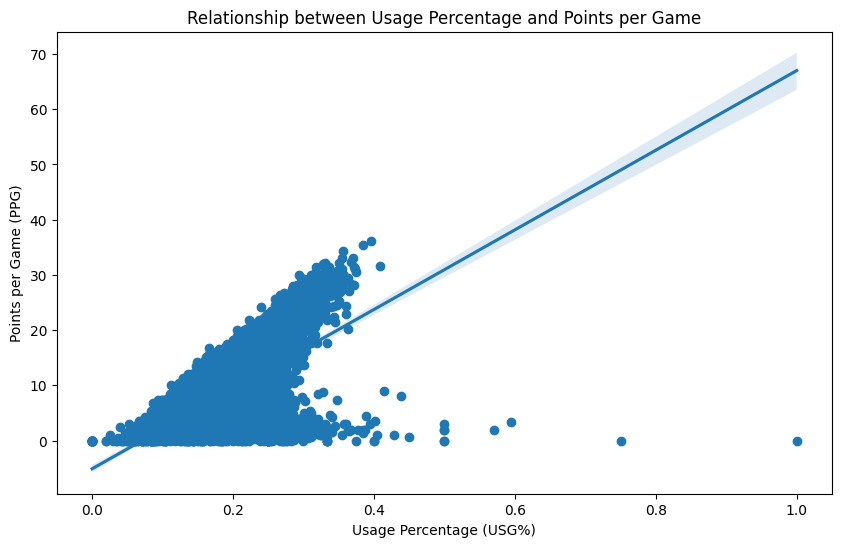

In [272]:
# Calculate the covariance between usage percentage and points per game
covariance_usg_pts = df['usg_pct'].cov(df['pts'])
print("Covariance between usage percentage and 15+ points per game:", round(covariance_usg_pts, 2))

# Calculate the correlation between usage percentage and points per game
correlation_usg_pts = df['usg_pct'].corr(df['pts'])
print("Correlation between usage percentage and 15+ points per game:", round(correlation_usg_pts, 2))

# Plotting the relationship using a scatter plot with regression line
plt.figure(figsize=(10, 6))
sns.regplot(x='usg_pct', y='pts', data=df, scatter_kws={'alpha':1})
plt.xlabel('Usage Percentage (USG%)')
plt.ylabel('Points per Game (PPG)')
plt.title('Relationship between Usage Percentage and Points per Game')
plt.show()

In [275]:
# Define height bins (you can adjust these as needed)
bins = [150, 180, 200, 220, 250]  # Example bins: Short, Medium, Tall
labels = ['Short', 'Medium', 'Tall', 'Very Tall']  # Example labels for bins

# Add a new column to the DataFrame indicating the height category of each player
df['height_category'] = pd.cut(df['player_height'], bins=bins, labels=labels)

# Calculate conditional probability of rebounds given height category
rebounds_given_height = df.groupby('height_category')['reb'].mean()
print("\nConditional Probability of Rebounds given Height Category:")
print(rebounds_given_height)


Conditional Probability of Rebounds given Height Category:
height_category
Short        1.724299
Medium       2.443937
Tall         4.367840
Very Tall    5.243373
Name: reb, dtype: float64
